In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import os
import pandas as pd

# Set the working directory to your project folder
os.chdir(r'C:\Users\SHAIVIK\Desktop\DATA ANALYYST internship\Day 5\titanic')

# Now you can load files with simple names
test_df = pd.read_csv('test.csv')

In [ ]:
test_df = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

In [ ]:
merged_df = test_df.merge(gender_submission, on='PassengerId')

In [ ]:
merged_df.head()
merged_df.info()
merged_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 42.5+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.363636
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.481622
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


In [ ]:
merged_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [ ]:
# Example for age - fill with median
merged_df['Age'].fillna(merged_df['Age'].median(), inplace=True)

In [ ]:
merged_df['FamilySize'] = merged_df['SibSp'] + merged_df['Parch'] + 1

In [ ]:
merged_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived,FamilySize
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000,418.000000,418.000000
mean,1100.500000,2.265550,29.599282,0.447368,0.392344,35.627188,0.363636,1.839713
std,120.810458,0.841838,12.703770,0.896760,0.981429,55.907576,0.481622,1.519072
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000,1.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000,1.000000,2.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000,11.000000


In [ ]:
merged_df.groupby('Sex')['Survived'].mean()
merged_df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.467290
2    0.322581
3    0.330275
Name: Survived, dtype: float64

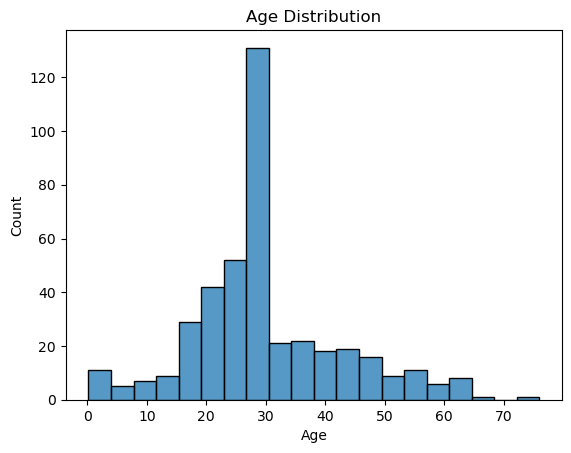

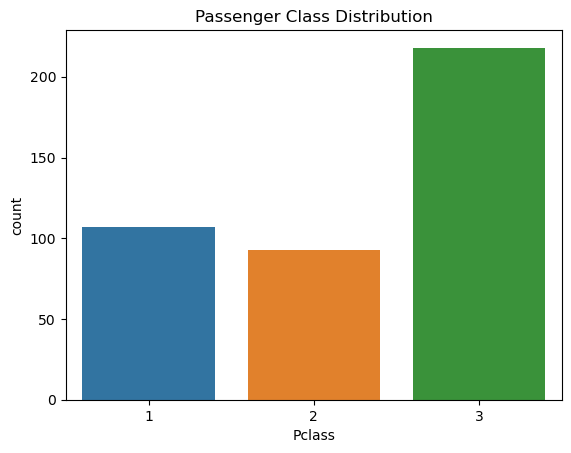

In [ ]:
# Histogram of ages
sns.histplot(data=merged_df, x='Age', bins=20)
plt.title('Age Distribution')
plt.show()

# Bar plot of passenger class
sns.countplot(data=merged_df, x='Pclass')
plt.title('Passenger Class Distribution')
plt.show()

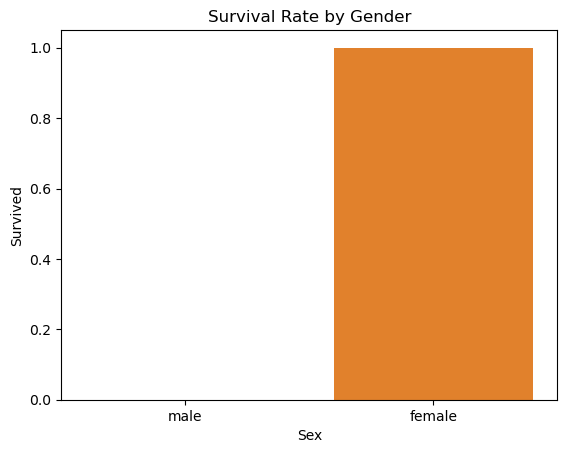

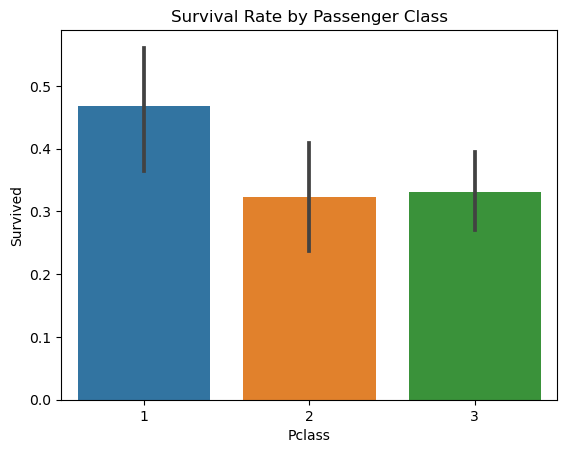

In [ ]:
# Survival by sex
sns.barplot(data=merged_df, x='Sex', y='Survived')
plt.title('Survival Rate by Gender')
plt.show()

# Survival by class
sns.barplot(data=merged_df, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class')
plt.show()

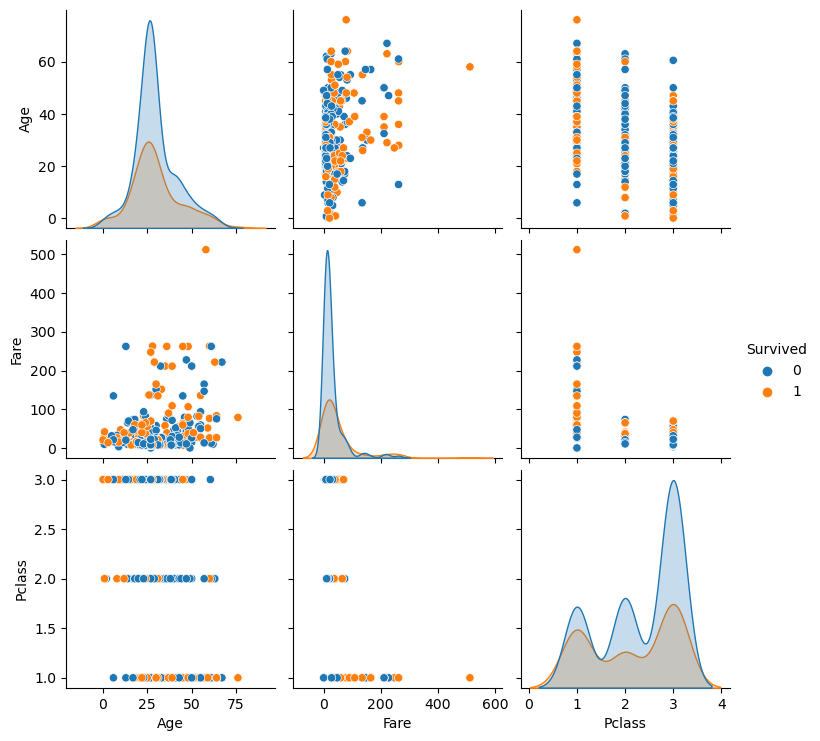

C:\Users\SHAIVIK\AppData\Local\Temp\ipykernel_14580\855395212.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm')


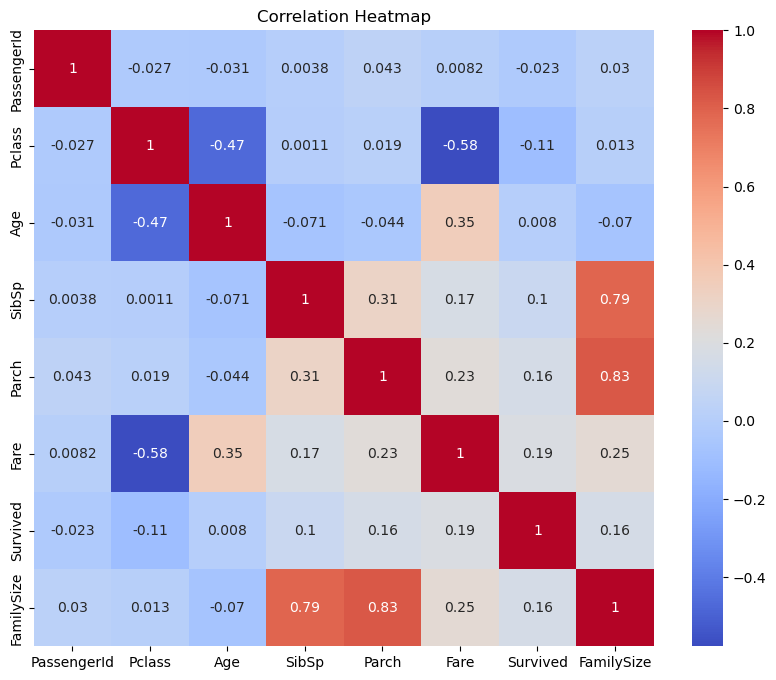

In [ ]:
# Pairplot of numerical variables
sns.pairplot(merged_df[['Age', 'Fare', 'Survived', 'Pclass']], hue='Survived')
plt.show()

# Heatmap of correlations
plt.figure(figsize=(10,8))
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

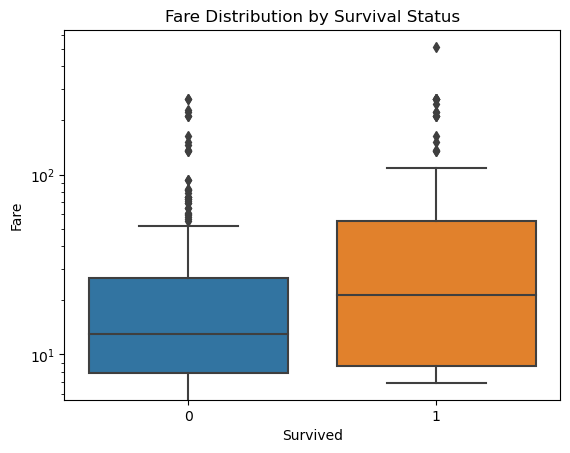

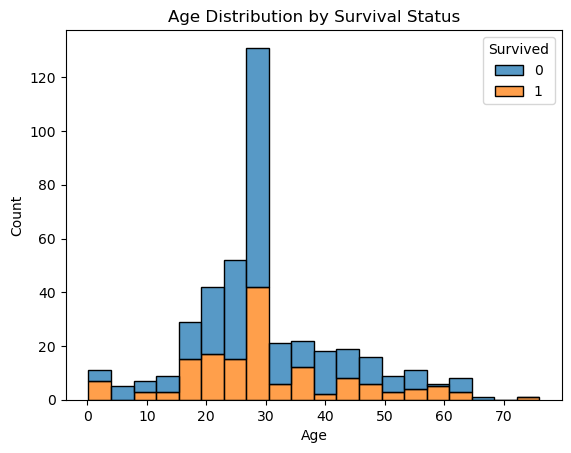

In [16]:
# Boxplot of fares by survival
sns.boxplot(data=merged_df, x='Survived', y='Fare')
plt.yscale('log')  # For better visualization if fare distribution is skewed
plt.title('Fare Distribution by Survival Status')
plt.show()

# Age distribution by survival
sns.histplot(data=merged_df, x='Age', hue='Survived', multiple='stack', bins=20)
plt.title('Age Distribution by Survival Status')
plt.show()